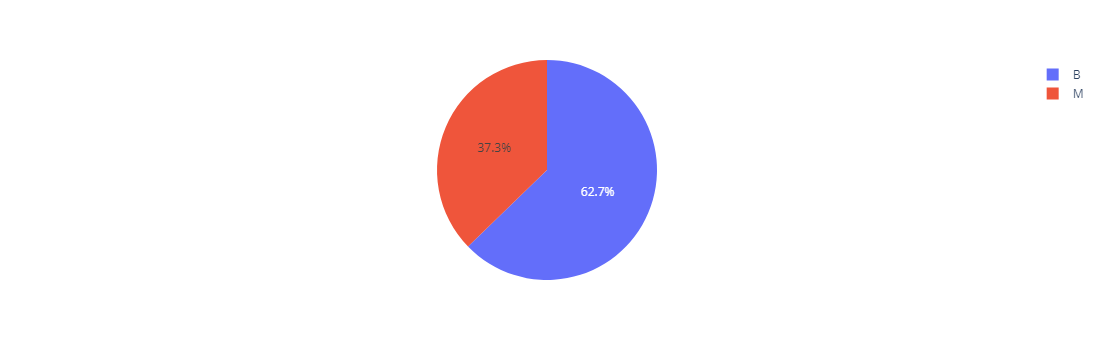

Features to drop due to high correlation: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
Number of features after dropping highly correlated ones: 26
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
texture_worst                0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32   

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,525 (21.59 KB)

 Trainable params: 1,801 (7.04 KB)

 Non-trainable params: 120 (480.00 B)

 Optimizer params: 3,604 (14.08 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Confusion Matrix:
 [[74  1]
 [ 2 37]]
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



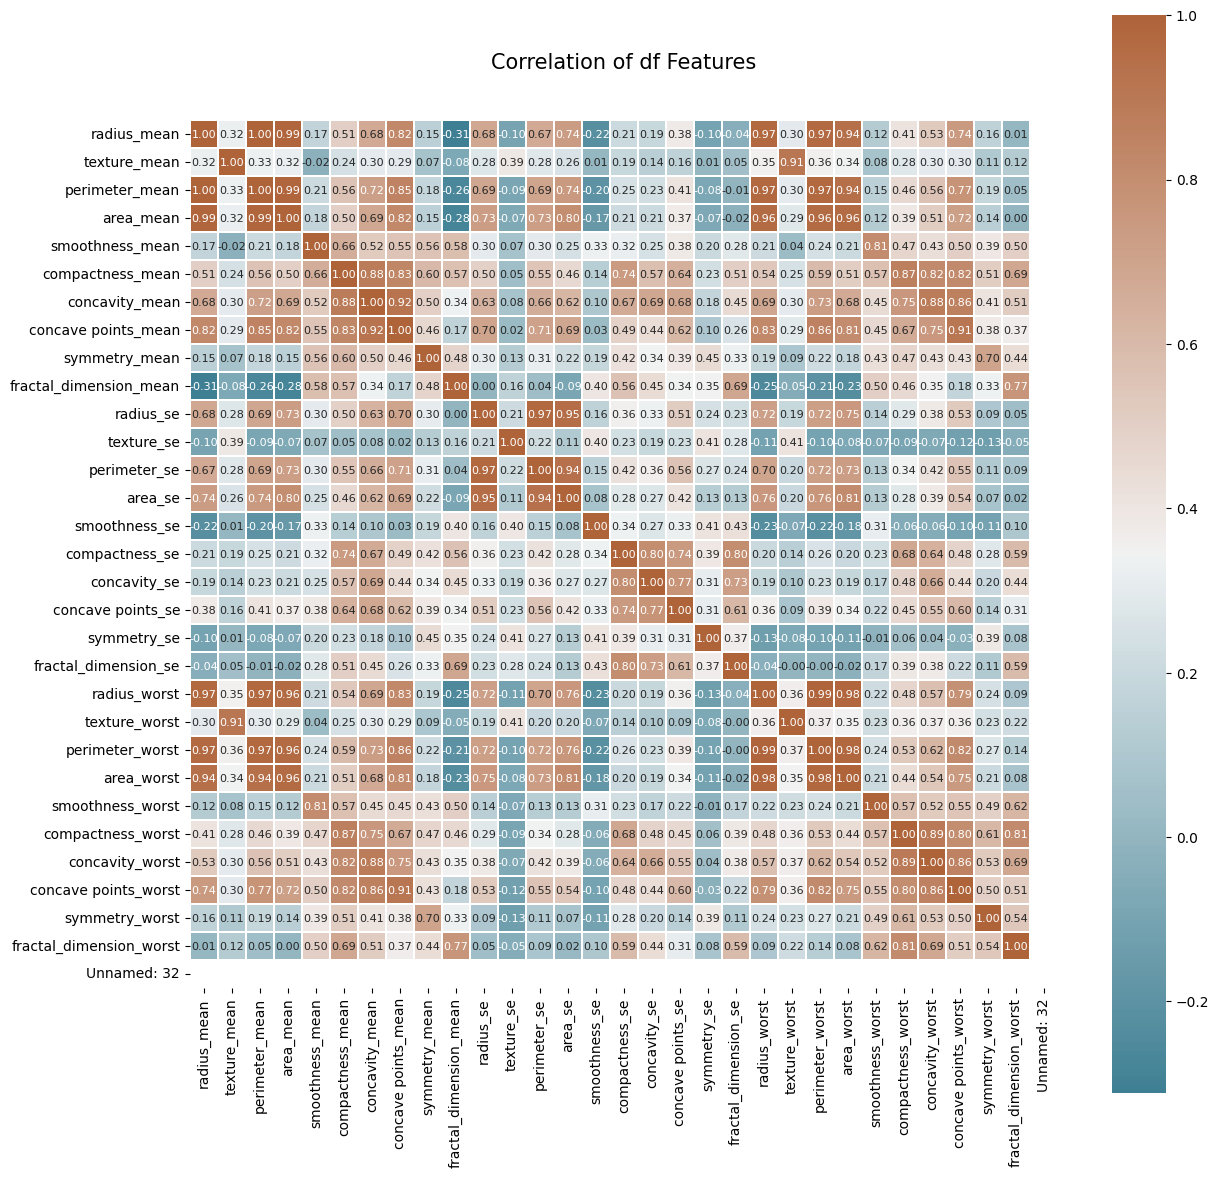

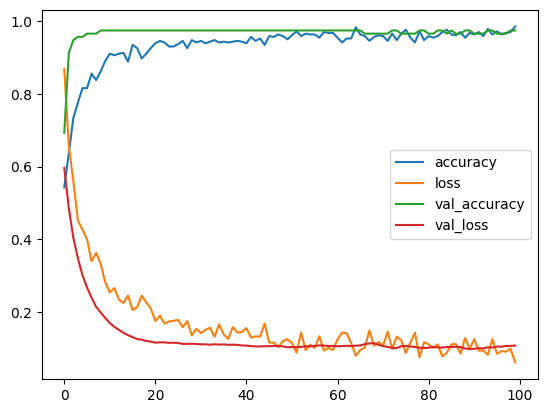

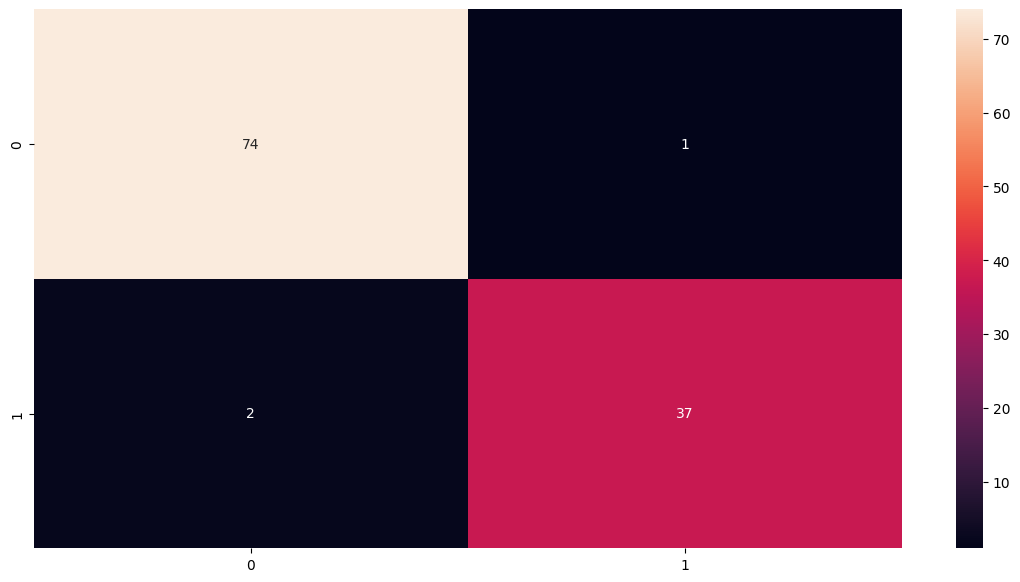

In [1]:

#This is the full code section and below this this full code is seperated into several code snippet where you can run each snippet to get more clarity and readability
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read data from CSV file
df = pd.read_csv('./FNAdata.csv')

# Print data info
df

# Import libraries for visualization
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# Configure plotly for notebook mode
init_notebook_mode(connected=True)

## Create pie chart to visualize diagnosis distribution (helps understand proportions of benign and malignant cases)
diagnosisPieChart = px.pie(df, values=df['diagnosis'].value_counts().values, names=df['diagnosis'].value_counts().index)
diagnosisPieChart.show()

# Calculate correlation matrix to identify potential feature dependencies
corr = df.iloc[:,2:].corr()

# Define colormap for heatmap (visual aid for interpreting correlations)
colormap = sns.diverging_palette(220, 30, as_cmap = True)

# Create heatmap to visualize feature correlations (helps identify redundant features)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,square = True,annot=True,fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
#title of the heat map
plt.title('Correlation of df Features', y=1.05, size=15)

# Create correlation matrix (absolute values) for easier identification of high correlations
corr_matrix = df.iloc[:, 2:].corr().abs()

# Select upper triangle of correlation matrix (excluding diagonal) to avoid self-correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 (highly correlated)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Features to drop due to high correlation:", to_drop)

# Drop highly correlated features to avoid multicollinearity issues
df.drop(to_drop, axis=1, inplace=True)

# Print number of remaining features after dropping highly correlated ones
print("Number of features after dropping highly correlated ones:", len(df.columns))

# Check for missing values (important to address before training)
print(df.isnull().sum())  # View how many missing values each column has

# Drop unnecessary features (can be adjusted based on domain knowledge)
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

# Separate independent (features) and dependent (target) variables
x = df.drop('diagnosis',axis=1)
y = df.diagnosis

# Encode categorical target variable (necessary for ANN processing)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

# Split data into training and testing sets for model evaluation

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

# Standardize features (optional, can be helpful for some algorithms)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


# Import Keras libraries for building the ANN model
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout
from tensorflow.keras.layers import BatchNormalization

# Create a sequential artificial neural network (ANN) model
ann = Sequential()

# Add first hidden layer with 30 neurons and ReLU activation (common choice for hidden layers due to its non-linearity)
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())  # Add batch normalization layer for regularization (improves generalization)
ann.add(Dropout(0.5)) # Add dropout layer to prevent overfitting (reduces model complexity)


# Add second hidden layer with 30 neurons and ReLU activation for better feature extraction
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization()) 
ann.add(Dropout(0.5))

# Add output layer with 1 neuron and sigmoid activation for binary classification
ann.add(Dense(units = 1,activation = 'sigmoid'))

# Compile the ANN using Adam optimizer (popular optimizer for various tasks), binary crossentropy loss (suitable for binary classification), and accuracy metric (measures overall correct predictions)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Implement early stopping to prevent overfitting (stops training when validation loss stops improving)
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Train the ANN in batches of 32 with validation data and early stopping
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

# Print model summary to understand the architecture (number of layers, neurons)

ann.summary()

# Plot training and validation loss curves to visualize the learning process (helps identify underfitting or overfitting)
losses = pd.DataFrame(ann.history.history)
losses.plot()

# Make predictions on test data
y_pred = ann.predict(xtest)

# Convert predictions to binary labels (threshold at 0.5) based on sigmoid activation output
y_pred = (y_pred>0.5)

# Calculate evaluation metrics to assess model performance
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(ytest,y_pred)  # Confusion matrix visualizes true vs predicted classifications
score = accuracy_score(ytest,y_pred) # Accuracy measures overall correct predictions

print("Confusion Matrix:\n", cm)
print("Accuracy:", score)

# Print classification report for detailed performance breakdown (precision, recall, F1-score)
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

# Create heatmap of confusion matrix for better visualization of classification results
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()


In [3]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Read data from CSV file
df = pd.read_csv('./FNAdata.csv')

# Print data info
df #you can also use print(df) because if you are running this code on other platform only df would not show anything 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.info #showing detailed info if there is no ouptu while you are running please add print()

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

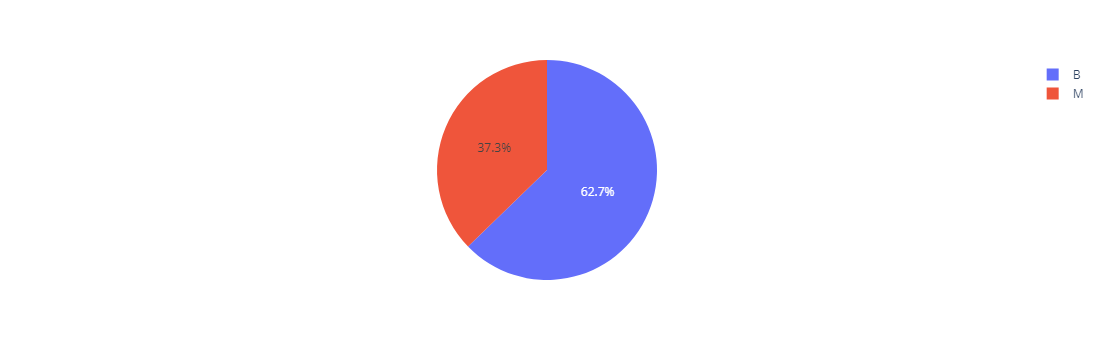

In [8]:
# Import libraries for visualization
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# Configure plotly for notebook mode
init_notebook_mode(connected=True)

# Create pie chart to visualize diagnosis distribution (helps understand proportions of benign and malignant cases)
diagnosisPieChart = px.pie(df, values=df['diagnosis'].value_counts().values, names=df['diagnosis'].value_counts().index)
diagnosisPieChart.show()


Text(0.5, 1.05, 'Correlation of df Features')

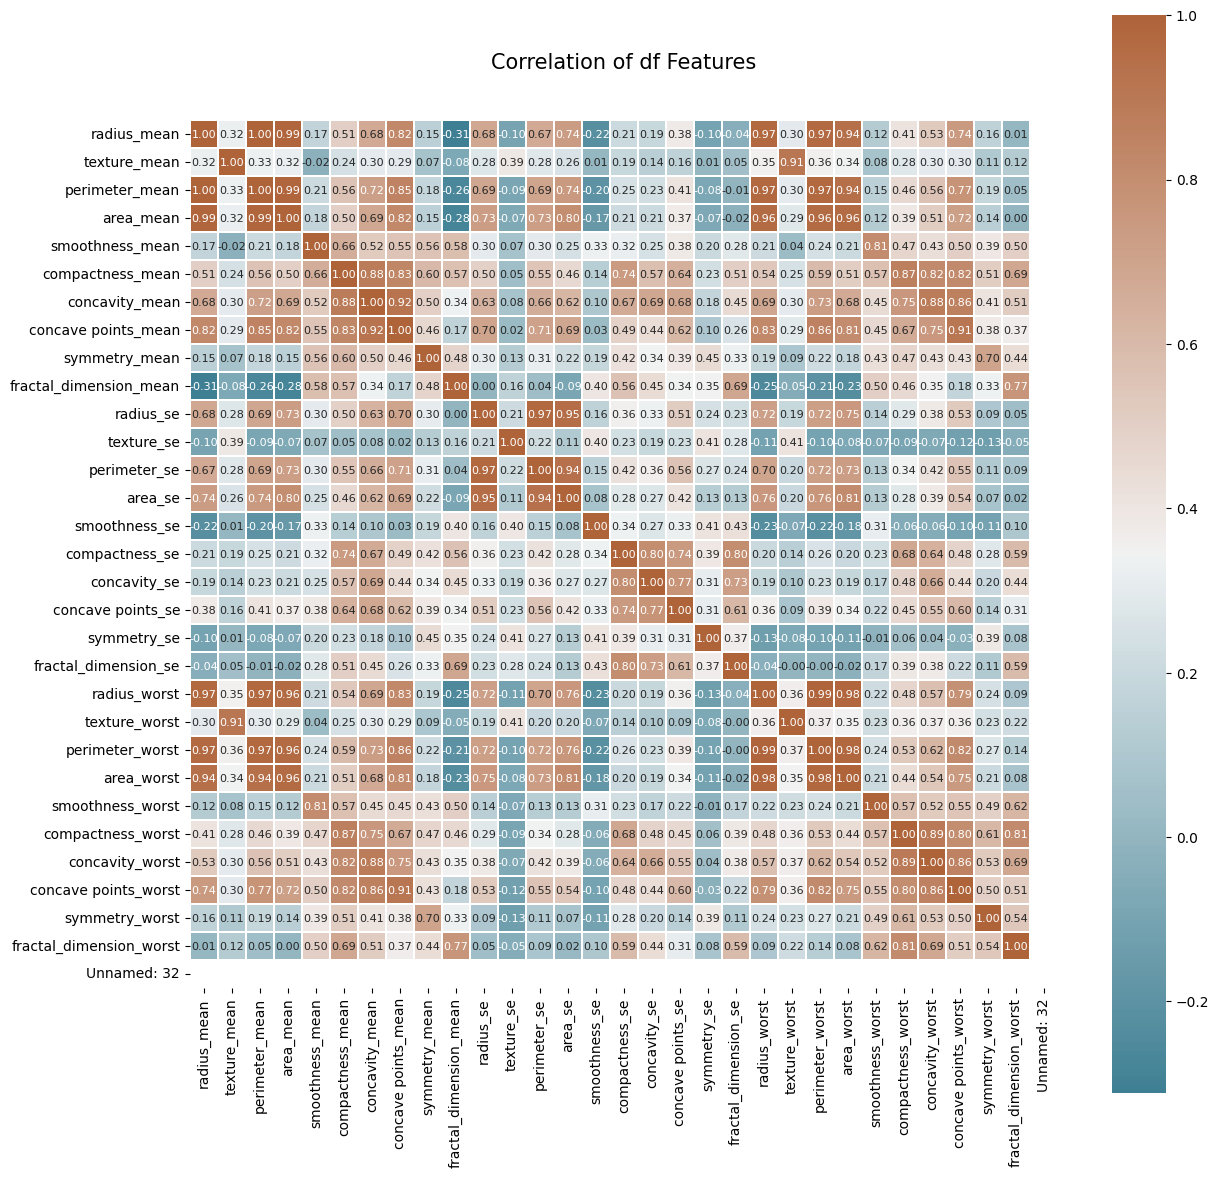

In [9]:
# Calculate correlation matrix to identify potential feature dependencies
corr = df.iloc[:,2:].corr()

# Define colormap for heatmap (visual aid for interpreting correlations)
colormap = sns.diverging_palette(220, 30, as_cmap = True)

# Create heatmap to visualize feature correlations (helps identify redundant features)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,square = True,annot=True,fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
#title of the heat map
plt.title('Correlation of df Features', y=1.05, size=15)


In [10]:
import numpy as np

# Create correlation matrix (absolute values) for easier identification of high correlations
corr_matrix = df.iloc[:, 2:].corr().abs()

# Select upper triangle of correlation matrix (excluding diagonal) to avoid self-correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95 (highly correlated)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Features to drop due to high correlation:", to_drop)

# Drop highly correlated features to avoid multicollinearity issues
df.drop(to_drop, axis=1, inplace=True)

Features to drop due to high correlation: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [11]:

# Print number of remaining features after dropping highly correlated ones
print("Number of features after dropping highly correlated ones:", len(df.columns))

Number of features after dropping highly correlated ones: 26


In [12]:
# Check for missing values (important to address before training)
print(df.isnull().sum())  # View how many missing values each column has

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
texture_worst                0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64


In [13]:
# Drop unnecessary features 
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [70]:
# Separate independent (features) and dependent (target) variables
#indepeendent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

In [71]:
# Encode categorical target variable (necessary for ANN processing)
from sklearn.preprocessing import LabelEncoder
#creating the object
label = LabelEncoder()
y = label.fit_transform(y)

In [72]:
# Split data into training and testing sets for model evaluation

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

In [73]:
# Standardize features 
from sklearn.preprocessing import StandardScaler
#creating object
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [74]:

# Import Keras libraries for building the ANN model
import keras
#import sequential module
from keras.models import Sequential
#import dense module for hidden layers and actiavtion functions
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout
from tensorflow.keras.layers import BatchNormalization

In [75]:
# Create a sequential artificial neural network (ANN) model
ann = Sequential()

# Add first hidden layer with 30 neurons and ReLU activation (common choice for hidden layers due to its non-linearity)
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())   # Add batch normalization layer for regularization (improves generalization)
ann.add(Dropout(0.5))  # Add dropout layer to prevent overfitting (reduces model complexity)

# Add second hidden layer with 30 neurons and ReLU activation for better feature extraction
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

# Add output layer with 1 neuron and sigmoid activation for binary classification
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [76]:
# Compile the ANN using Adam optimizer (popular optimizer for various tasks), binary crossentropy loss (suitable for binary classification), and accuracy metric (measures overall correct predictions)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Implement early stopping to prevent overfitting (stops training when validation loss stops improving)
#seting callback for monitoring maximumaccuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Train the ANN in batches of 32(This ia a natch learning) with validation data and early stopping
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4899 - loss: 1.0783 - val_accuracy: 0.3684 - val_loss: 0.7870
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5760 - loss: 0.7867 - val_accuracy: 0.6842 - val_loss: 0.5956
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7109 - loss: 0.6081 - val_accuracy: 0.8421 - val_loss: 0.4668
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7137 - loss: 0.5674 - val_accuracy: 0.9035 - val_loss: 0.3853
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7422 - loss: 0.4759 - val_accuracy: 0.9298 - val_loss: 0.3293
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8410 - loss: 0.3629 - val_accuracy: 0.9386 - val_loss: 0.2873
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8145 - loss: 0.3785 - val_accuracy: 0.9386 - val_loss: 0.2550
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8781 - loss: 0.3173 - val_accuracy: 0.9561 - 

In [77]:
# Print model summary to understand the architecture (number of layers, neurons)

ann.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 30)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,525 (21.59 KB)

 Trainable params: 1,801 (7.04 KB)

 Non-trainable params: 120 (480.00 B)

 Optimizer params: 3,604 (14.08 KB)

<Axes: >

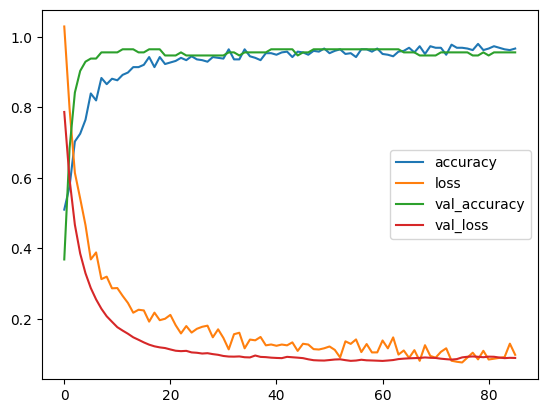

In [81]:
# Plot training and validation loss curves to visualize the learning process (helps identify underfitting or overfitting)
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [82]:
# Make predictions on test data
y_pred = ann.predict(xtest)

# Convert predictions to binary labels (threshold at 0.5) based on sigmoid activation output
y_pred = (y_pred>0.5)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [83]:
# Calculate evaluation metrics to assess model performance
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(ytest,y_pred)  # Confusion matrix visualizes true vs predicted classifications
score = accuracy_score(ytest,y_pred) # Accuracy measures overall correct predictions

print("Confusion Matrix:\n", cm)
print("Accuracy score:", score)


Confusion Matrix:
 [[73  2]
 [ 3 36]]
Accuracy score: 0.956140350877193


In [84]:
# Print classification report for detailed performance breakdown (precision, recall, F1-score)
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



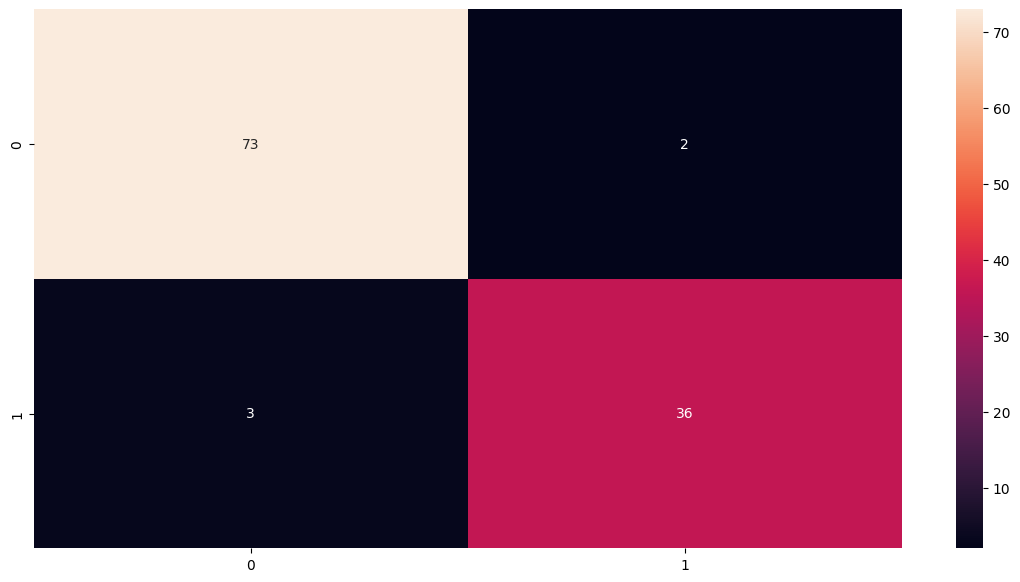

In [85]:
# Create heatmap of confusion matrix for better visualization of classification results
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()
